In [1]:
import os
import numpy as np
import pandas as pd

In [41]:
sample_id = 'HG01777'

online_candidate_res_root_dir=r'/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/f_cnv_out/online/1KGP_bak/'+sample_id+'/cnv_call'
online_re_fname = 'Analysis{}_1000_200_out_cnv.csv'.format(sample_id)
online_fn = os.path.join(online_candidate_res_root_dir, online_re_fname)

in_out_pred = pd.read_csv(online_fn, sep='\t')

# prior_p = [0.7, 0.15, 0.15]

# in_out_pred['P_NEU'] = in_out_pred['P_NEU'] *  prior_p[0]
# in_out_pred['P_DEL'] = in_out_pred['P_DEL'] *  prior_p[1]
# in_out_pred['P_DUP'] = in_out_pred['P_DUP'] *  prior_p[2]

# in_out_pred['T_SUM'] = in_out_pred.loc[:,['P_NEU', 'P_DEL', 'P_DUP']].sum(axis=1)

# in_out_pred['P_NEU'] = in_out_pred['P_NEU']/in_out_pred['T_SUM']
# in_out_pred['P_DEL'] = in_out_pred['P_DEL']/in_out_pred['T_SUM']
# in_out_pred['P_DUP'] = in_out_pred['P_DUP']/in_out_pred['T_SUM']

in_out_pred.head()

,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,PRED_L,ID,POS,END,...,INTERVAL_LOWER,INTERVAL_UPPER,INTERVAL_LEN,UNION_LEN,CHROM,TRUE_L,CENTOR_INTER_LEN,SUPDUP_INTER_LEN,CENT_CALLLEN_RATIO,SUPDUP_CALLLEN_RATIO
0,51800,52000,200,0.474399,0.149267,0.376334,2,NaN,NaN,NaN,...,-1,-1,-1,-1,chr1,0,0,0,0.0,0.0
1,73200,75200,2000,0.492451,0.460968,0.046582,1,NaN,NaN,NaN,...,-1,-1,-1,-1,chr1,0,0,0,0.0,0.0
2,358568,358768,200,0.494868,0.006919,0.498212,2,NaN,NaN,NaN,...,-1,-1,-1,-1,chr1,0,0,0,0.0,0.0
3,361568,361768,200,0.371291,0.070549,0.558160,2,NaN,NaN,NaN,...,-1,-1,-1,-1,chr1,0,0,0,0.0,0.0
4,362168,363368,1200,0.622786,0.098695,0.278519,2,NaN,NaN,NaN,...,-1,-1,-1,-1,chr1,0,0,0,0.0,0.0


In [42]:
in_out_pred.columns

Index(['POS_S', 'POS_E', 'LEN', 'P_NEU', 'P_DEL', 'P_DUP', 'PRED_L', 'ID',
       'POS', 'END', 'SVLEN', 'ALT', 'SMP_GT', 'ADJTYPE', 'ADJAF',
       'INTERVAL_LOWER', 'INTERVAL_UPPER', 'INTERVAL_LEN', 'UNION_LEN',
       'CHROM', 'TRUE_L', 'CENTOR_INTER_LEN', 'SUPDUP_INTER_LEN',
       'CENT_CALLLEN_RATIO', 'SUPDUP_CALLLEN_RATIO'],
      dtype='object')

In [43]:
tmp_df = in_out_pred[['P_NEU', 'P_DEL', 'P_DUP']]
tmp_df.columns = ['0', '1', '2']
in_out_pred['PRED_P_L'] = tmp_df.idxmax(axis=1, skipna=True)
in_out_pred['PRED_P_L'] = in_out_pred['PRED_P_L'].astype(int)
# in_out_pred.loc[(in_out_pred['PRED_L'] != 0) & (in_out_pred['PRED_P_L'] == 0), 'PRED_L'] = 0


In [44]:
in_out_pred.columns

Index(['POS_S', 'POS_E', 'LEN', 'P_NEU', 'P_DEL', 'P_DUP', 'PRED_L', 'ID',
       'POS', 'END', 'SVLEN', 'ALT', 'SMP_GT', 'ADJTYPE', 'ADJAF',
       'INTERVAL_LOWER', 'INTERVAL_UPPER', 'INTERVAL_LEN', 'UNION_LEN',
       'CHROM', 'TRUE_L', 'CENTOR_INTER_LEN', 'SUPDUP_INTER_LEN',
       'CENT_CALLLEN_RATIO', 'SUPDUP_CALLLEN_RATIO', 'PRED_P_L'],
      dtype='object')

In [48]:
in_pred_analysis_df = in_out_pred[['POS_S', 'POS_E', 'LEN', 'P_NEU', 'P_DEL', 'P_DUP', 'ID',
       'POS', 'END', 'SVLEN', 'ALT', 'SMP_GT',
       'CHROM', 'TRUE_L', 'PRED_P_L']].copy()

in_pred_analysis_df.drop(in_pred_analysis_df[(in_pred_analysis_df['TRUE_L']==0)& 
                         (in_pred_analysis_df['PRED_P_L']==0)].index, inplace=True)
in_pred_analysis_df.head()

,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,ID,POS,END,SVLEN,ALT,SMP_GT,CHROM,TRUE_L,PRED_P_L
2,358568,358768,200,0.494868,0.006919,0.498212,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
3,361568,361768,200,0.371291,0.070549,0.558160,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
5,395168,395368,200,0.030730,0.050509,0.918760,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
13,640988,641988,1000,0.459234,0.008984,0.531782,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
15,692988,693188,200,0.243198,0.000769,0.756033,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2


In [50]:
all_positives_df = in_pred_analysis_df[in_pred_analysis_df['TRUE_L']==0]
all_positives_df.head()

,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,ID,POS,END,SVLEN,ALT,SMP_GT,CHROM,TRUE_L,PRED_P_L
2,358568,358768,200,0.494868,0.006919,0.498212,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
3,361568,361768,200,0.371291,0.070549,0.558160,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
5,395168,395368,200,0.030730,0.050509,0.918760,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
13,640988,641988,1000,0.459234,0.008984,0.531782,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
15,692988,693188,200,0.243198,0.000769,0.756033,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2


## Alysis the false positives
in `prediction_merge.py`, we determine the segment region label using the maximum count of the predicted labels in the segments region, which is represented in `PRED_L` columns. Whereas we re-label these region by using the maxmim probability that represent in `PRED_P_L`. 

We find that most fp result from the `PRED_L`. see below:

since `tmp_ana1[(tmp_ana1['PRED_P_L']!=0)&(tmp_ana1['PRED_L']==0)]: 0`, thus the final fp should be determined by 

In [51]:
f_fps_df = in_pred_analysis_df[(in_pred_analysis_df['TRUE_L']==0)&
                               (in_pred_analysis_df['PRED_P_L']!=0)]

In [52]:
print('# of f_fps_df: {}'.format(len(f_fps_df)))
f_fps_df.head()

# of f_fps_df: 37637


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,ID,POS,END,SVLEN,ALT,SMP_GT,CHROM,TRUE_L,PRED_P_L
2,358568,358768,200,0.494868,0.006919,0.498212,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
3,361568,361768,200,0.371291,0.070549,0.558160,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
5,395168,395368,200,0.030730,0.050509,0.918760,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
13,640988,641988,1000,0.459234,0.008984,0.531782,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
15,692988,693188,200,0.243198,0.000769,0.756033,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2


In [53]:
x_f_fps_df = f_fps_df[f_fps_df['LEN']>=1000]
print('# of x_f_fps_df: {}'.format(len(x_f_fps_df)))
x_f_fps_df.head()

# of x_f_fps_df: 7367


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,ID,POS,END,SVLEN,ALT,SMP_GT,CHROM,TRUE_L,PRED_P_L
13,640988,641988,1000,0.459234,0.008984,0.531782,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
16,784188,787188,3000,0.283855,0.268112,0.448033,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
19,794388,795588,1200,0.339821,0.006695,0.653484,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
21,801988,803988,2000,0.364830,0.132253,0.502917,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2
28,847188,849788,2600,0.434278,0.125785,0.439937,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,2


Now we analysis positives (including true positve and false negative)

In [54]:
positive_res_df = in_pred_analysis_df[(in_pred_analysis_df['TRUE_L']!=0)]
print('# of positive_res_df: {}'.format(len(positive_res_df)))
positive_res_df.head()

# of positive_res_df: 5127


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,ID,POS,END,SVLEN,ALT,SMP_GT,CHROM,TRUE_L,PRED_P_L
100,3180290,3181890,1600,0.982899,0.000629,0.016472,DEL_pindel_98,3181807.0,3181925.0,118.0,C,"HG01777,1|0",chr1,1,0
112,4141290,4145490,4200,0.885075,0.020713,0.094213,DEL_pindel_129,4144607.0,4144657.0,50.0,A,"HG01777,0|1",chr1,1,0
210,7509890,7511290,1400,0.789182,0.164776,0.046042,BI_GS_DEL1_B5_P0008_654,7510014.0,7511461.0,1447.0,<CN0>,"HG01777,1|0",chr1,1,0
553,16699184,16701784,2600,0.435907,0.011286,0.552807,DUP_gs_CNV_1_17026064_17052112,16699569.0,16725617.0,26048.0,"<CN2>,<CN3>,<CN4>,<CN5>","HG01777,2|2",chr1,2,2
554,16702184,16702384,200,0.002995,0.000005,0.997000,DUP_gs_CNV_1_17026064_17052112,16699569.0,16725617.0,26048.0,"<CN2>,<CN3>,<CN4>,<CN5>","HG01777,2|2",chr1,2,2


In [13]:
gp_pos_df = positive_res_df.groupby('ID')

In [14]:
gp_pos_df.ngroups

1058

In [15]:
def rm_duprows(df):
    pred_lbl = df['PRED_P_L'].value_counts().keys().tolist()
    if len(pred_lbl)>1 and 0 in pred_lbl:
        return df[df['PRED_P_L']!=0]
    elif len(pred_lbl) == 1 and pred_lbl[0]==0:
        return df[0:1]
    else:
        return df

In [16]:
filtered_gp_pos_df = gp_pos_df.apply(rm_duprows).reset_index(drop=True)

In [19]:
x_filtered_gp_pos_df=filtered_gp_pos_df[filtered_gp_pos_df['LEN']>=1000]

In [20]:
print('# of poss: {}'.format(len(x_filtered_gp_pos_df)))
x_filtered_gp_pos_df.head()

# of poss: 1079


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,PRED_L,ID,POS,END,...,INTERVAL_UPPER,INTERVAL_LEN,UNION_LEN,CHROM,TRUE_L,CENTOR_INTER_LEN,SUPDUP_INTER_LEN,CENT_CALLLEN_RATIO,SUPDUP_CALLLEN_RATIO,PRED_P_L
0,20561400,20562600,1200,0.731357,0.237383,0.031260,0,BI_GS_CNV_10_20849543_20860166,20560614.0,20571237.0,...,20562600,1200,10623,chr10,1,0,0,0.0,0.0,0
6,9524050,9526650,2600,0.334188,0.654469,0.011342,1,BI_GS_CNV_12_9635128_9688881,9482532.0,9536285.0,...,9526650,2600,53753,chr12,1,0,0,0.0,0.0,1
13,18822311,18827911,5600,0.794629,0.061489,0.143882,0,BI_GS_CNV_17_18729995_18745198,18826682.0,18841885.0,...,18827911,1229,19574,chr17,1,0,0,0.0,0.0,0
14,45505780,45507180,1400,0.801513,0.165847,0.032639,0,BI_GS_CNV_17_43576081_43589376,45498715.0,45512010.0,...,45507180,1400,13295,chr17,1,0,0,0.0,0.0,0
16,120955235,120956235,1000,0.229080,0.698505,0.072415,1,BI_GS_CNV_1_144468090_144480623,120953580.0,120966121.0,...,120956235,1000,12541,chr1,1,0,0,0.0,0.0,1


In [21]:
tp_del_df = x_filtered_gp_pos_df[(x_filtered_gp_pos_df['PRED_P_L']==x_filtered_gp_pos_df['TRUE_L'])&
                                (x_filtered_gp_pos_df['PRED_P_L']==1)]

print('# of tp_del_df: {}'.format(len(tp_del_df)))
tp_del_df.head()

# of tp_del_df: 263


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,PRED_L,ID,POS,END,...,INTERVAL_UPPER,INTERVAL_LEN,UNION_LEN,CHROM,TRUE_L,CENTOR_INTER_LEN,SUPDUP_INTER_LEN,CENT_CALLLEN_RATIO,SUPDUP_CALLLEN_RATIO,PRED_P_L
6,9524050,9526650,2600,0.334188,0.654469,0.011342,1,BI_GS_CNV_12_9635128_9688881,9482532.0,9536285.0,...,9526650,2600,53753,chr12,1,0,0,0.0,0.0,1
16,120955235,120956235,1000,0.229080,0.698505,0.072415,1,BI_GS_CNV_1_144468090_144480623,120953580.0,120966121.0,...,120956235,1000,12541,chr1,1,0,0,0.0,0.0,1
17,120959435,120961035,1600,0.135356,0.821889,0.042756,1,BI_GS_CNV_1_144468090_144480623,120953580.0,120966121.0,...,120961035,1600,12541,chr1,1,0,0,0.0,0.0,1
27,111526374,111527974,1600,0.341696,0.632450,0.025854,1,BI_GS_CNV_3_111243593_111248855,111524746.0,111530008.0,...,111527974,1600,5262,chr3,1,0,0,0.0,0.0,1
28,162803974,162804974,1000,0.491487,0.508358,0.000155,1,BI_GS_CNV_3_162512202_162525833,162794414.0,162808045.0,...,162804974,1000,13631,chr3,1,0,0,0.0,0.0,1


In [22]:
tp_dup_df = x_filtered_gp_pos_df[(x_filtered_gp_pos_df['PRED_P_L']==x_filtered_gp_pos_df['TRUE_L'])&
                                (x_filtered_gp_pos_df['PRED_P_L']==2)]

print('# of tp_dup_df: {}'.format(len(tp_dup_df)))
tp_dup_df.head()

# of tp_dup_df: 215


,POS_S,POS_E,LEN,P_NEU,P_DEL,P_DUP,PRED_L,ID,POS,END,...,INTERVAL_UPPER,INTERVAL_LEN,UNION_LEN,CHROM,TRUE_L,CENTOR_INTER_LEN,SUPDUP_INTER_LEN,CENT_CALLLEN_RATIO,SUPDUP_CALLLEN_RATIO,PRED_P_L
651,46559865,46563665,3800,0.456468,0.073224,0.470309,2,DUP_gs_CNV_10_46976292_47023561,46526512.0,46573324.0,...,46563665,3800,46812,chr10,2,0,0,0.0,0.0,2
652,46564065,46566065,2000,0.167204,0.041269,0.791528,2,DUP_gs_CNV_10_46976292_47023561,46526512.0,46573324.0,...,46566065,2000,46812,chr10,2,0,0,0.0,0.0,2
653,46572665,46573665,1000,0.377916,0.010419,0.611665,2,DUP_gs_CNV_10_46976292_47023561,46526512.0,46573324.0,...,46573324,659,47153,chr10,2,0,0,0.0,0.0,2
654,46402265,46405265,3000,0.202272,0.073683,0.724045,2,DUP_gs_CNV_10_47089972_47150813,46398949.0,46459774.0,...,46405265,3000,60825,chr10,2,0,0,0.0,0.0,2
655,46431265,46432465,1200,0.249323,0.003769,0.746908,2,DUP_gs_CNV_10_47089972_47150813,46398949.0,46459774.0,...,46432465,1200,60825,chr10,2,0,0,0.0,0.0,2


In [31]:
reg_size = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

tp = []
fp = []
real_p = []

for i_reg in reg_size:
    i_fp_df = f_fps_df[f_fps_df['LEN']>=i_reg]
    fp.append(len(i_fp_df))
    pos_pf_df = filtered_gp_pos_df[(filtered_gp_pos_df['LEN']>=i_reg)]
    real_p.append(len(pos_pf_df))
    tp_df = pos_pf_df[pos_pf_df['PRED_P_L']==pos_pf_df['TRUE_L']]
    tp.append(len(tp_df))

re_df = pd.DataFrame(data={'tp':tp, 'fp': fp, 'all_p':real_p, 'range_zie': reg_size})
re_df['tpr']  = re_df['tp']/re_df['all_p']
re_df['prec']  = re_df['tp']/(re_df['tp']+re_df['fp'])


In [32]:
re_df

,tp,fp,all_p,range_zie,tpr,prec
0,1035,37637,1931,0,0.535992,0.026764
1,478,7367,1079,1000,0.443003,0.060931
2,143,880,424,2000,0.337264,0.139785
3,52,211,200,3000,0.260000,0.197719
4,26,70,112,4000,0.232143,0.270833
5,16,25,56,5000,0.285714,0.390244
6,6,8,30,6000,0.200000,0.428571
7,3,4,15,7000,0.200000,0.428571
8,3,2,11,8000,0.272727,0.600000
9,2,1,8,9000,0.250000,0.666667


In [25]:
import seaborn as sns


Text(0,0.5,'Rate')

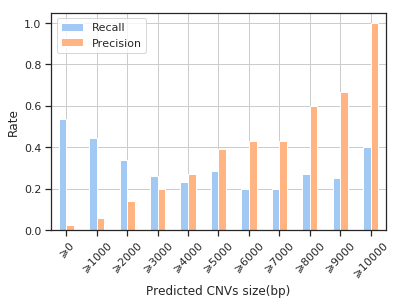

In [39]:
from matplotlib import pyplot as plt
ax = re_df[['tpr','prec']].plot(kind='bar', grid=True, rot=45) # grid=True
# sns.set(style="ticks")
sns.set(style="ticks") # ticks, whitegrid
sns.set_palette("pastel")
plt.legend(['Recall', 'Precision'])

x_tlabel_lst = []
for reg_s in reg_size:
    str_l = r"$\geqslant"+str(reg_s)+"$"
    x_tlabel_lst.append(str_l)

ax.set_xticklabels(x_tlabel_lst)
plt.xlabel('Predicted CNVs size(bp)')
plt.ylabel('Rate')

In [117]:
reg_size = [0, 1000, 2000, 3000, 4000, 5000]

tp = []
fp = []
real_p = []

for i_reg in reg_size:
    i_fp_df = f_fps_df[(f_fps_df['LEN']>=i_reg)&(f_fps_df['PRED_P_L']==1)]
    fp.append(len(i_fp_df))
    pos_pf_df = filtered_gp_pos_df[(filtered_gp_pos_df['LEN']>=i_reg)&
                                   (filtered_gp_pos_df['TRUE_L']==1)]
    real_p.append(len(pos_pf_df))
    tp_df = pos_pf_df[(pos_pf_df['PRED_P_L']==pos_pf_df['TRUE_L'])&
                     (pos_pf_df['PRED_P_L']==1)]
    tp.append(len(tp_df))

re_df = pd.DataFrame(data={'tp':tp, 'fp': fp, 'all_p':real_p, 'range_zie': reg_size})
re_df['tpr']  = re_df['tp']/re_df['all_p']
re_df['prec']  = re_df['tp']/(re_df['tp']+re_df['fp'])

In [119]:
re_df

,tp,fp,all_p,range_zie,tpr,prec
0,459,24604,1280,0,0.358594,0.018314
1,148,1591,714,1000,0.207283,0.085106
2,19,79,270,2000,0.070370,0.193878
3,4,13,133,3000,0.030075,0.235294
4,0,3,75,4000,0.000000,0.000000
5,0,1,32,5000,0.000000,0.000000


Text(0,0.5,'Rate')

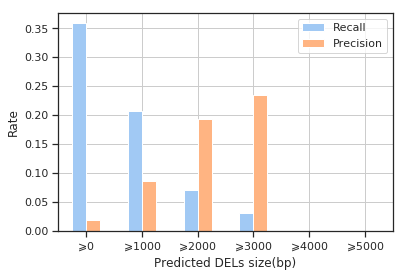

In [121]:
from matplotlib import pyplot as plt
ax = re_df[['tpr','prec']].plot(kind='bar', grid=True, rot=0) # grid=True
# sns.set(style="ticks")
sns.set(style="ticks") # ticks, whitegrid
sns.set_palette("pastel")
plt.legend(['Recall', 'Precision'])

ax.set_xticklabels([r"$\geqslant0$", r"$\geqslant1000$", r"$\geqslant2000$", 
                    r"$\geqslant3000$", r"$\geqslant4000$",r"$\geqslant5000$"])
plt.xlabel('Predicted DELs size(bp)')
plt.ylabel('Rate')

In [122]:
reg_size = [0, 1000, 2000, 3000, 4000, 5000]

tp = []
fp = []
real_p = []

for i_reg in reg_size:
    i_fp_df = f_fps_df[(f_fps_df['LEN']>=i_reg)&(f_fps_df['PRED_P_L']==2)]
    fp.append(len(i_fp_df))
    pos_pf_df = filtered_gp_pos_df[(filtered_gp_pos_df['LEN']>=i_reg)&
                                   (filtered_gp_pos_df['TRUE_L']==2)]
    real_p.append(len(pos_pf_df))
    tp_df = pos_pf_df[(pos_pf_df['PRED_P_L']==pos_pf_df['TRUE_L'])&
                     (pos_pf_df['PRED_P_L']==2)]
    tp.append(len(tp_df))

re_df = pd.DataFrame(data={'tp':tp, 'fp': fp, 'all_p':real_p, 'range_zie': reg_size})
re_df['tpr']  = re_df['tp']/re_df['all_p']
re_df['prec']  = re_df['tp']/(re_df['tp']+re_df['fp'])

In [124]:
re_df

,tp,fp,all_p,range_zie,tpr,prec
0,218,3868,315,0,0.692063,0.053353
1,81,570,132,1000,0.613636,0.124424
2,34,61,67,2000,0.507463,0.357895
3,10,28,34,3000,0.294118,0.263158
4,5,7,23,4000,0.217391,0.416667
5,5,3,17,5000,0.294118,0.625000


Text(0,0.5,'Rate')

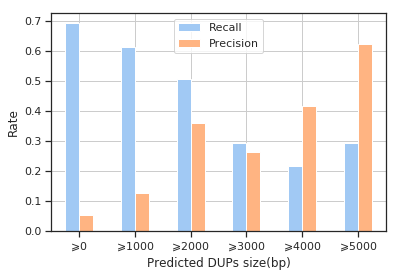

In [126]:
from matplotlib import pyplot as plt
ax = re_df[['tpr','prec']].plot(kind='bar', grid=True, rot=0) # grid=True
# sns.set(style="ticks")
sns.set(style="ticks") # ticks, whitegrid
sns.set_palette("pastel")
plt.legend(['Recall', 'Precision'])

ax.set_xticklabels([r"$\geqslant0$", r"$\geqslant1000$", r"$\geqslant2000$", 
                    r"$\geqslant3000$", r"$\geqslant4000$",r"$\geqslant5000$"])
plt.xlabel('Predicted DUPs size(bp)')
plt.ylabel('Rate')